In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [74]:
PATH = "weight-height.csv"
dataset = pd.read_csv(PATH)

Data type of elements in x column: float64
Data type of elements in y column: float64


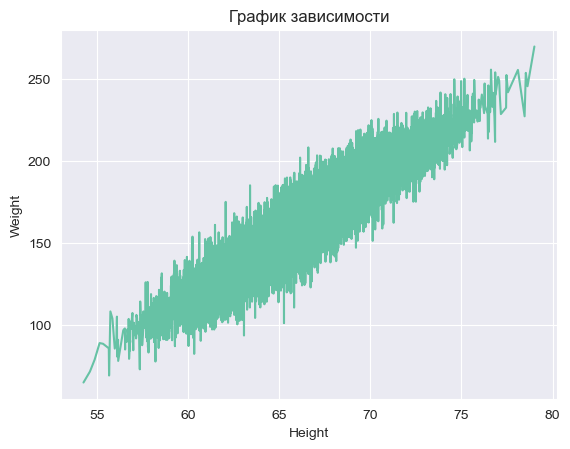

In [79]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

x = dataset["Height"]
y = dataset["Weight"]

sns.lineplot(x=x, y=y)

print("Data type of elements in x column:", x.dtype)
print("Data type of elements in y column:", y.dtype)

plt.title('График зависимости')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [80]:
x = np.array(dataset["Height"]).reshape(-1, 1)
y = np.array(dataset["Weight"]).reshape(-1, 1)

In [87]:
DEGREES = 3

regression = make_pipeline(PolynomialFeatures(DEGREES), LinearRegression())
regression.fit(x, y)
predictions = regression.predict(x)
mean_squared_error = np.mean((predictions - np.array(y)) ** 2)
print(f'Среднеквадратическая ошибка = {mean_squared_error}')

Среднеквадратическая ошибка = 146.69451243866905


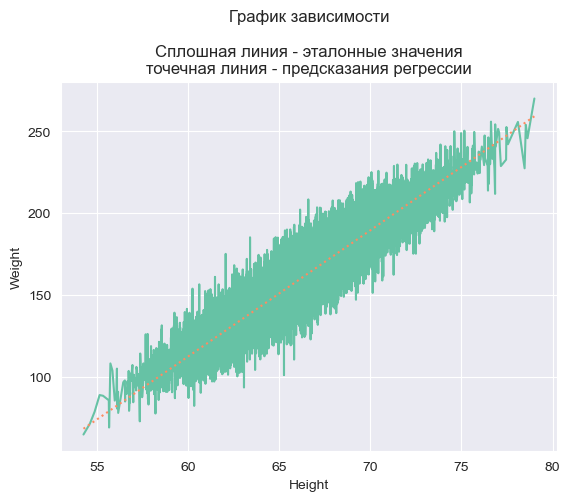

In [85]:
sns.lineplot(
    x=dataset["Height"],
    y=dataset["Weight"],
    linestyle="solid"
)

sns.lineplot(
    x=dataset["Height"],
    y=predictions.reshape(-1),
    linestyle="dotted"
)

plt.title(
    'График зависимости\n\n'
    'Сплошная линия - эталонные значения\n'
    'точечная линия - предсказания регрессии'
)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [86]:
x_parameters = np.append(
    regression['linearregression'].intercept_[0],
    regression['linearregression'].coef_[0][1:]
)

x_parameters

array([-3.44224056e+02,  7.52063401e+00,  1.47943267e-03])